In [1]:
#Question 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('week2.csv',delimiter=',')             #read the initial file saved in week2.csv
data

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Price,Year,Month,change,Day_Perc_Change,Trend
0,0,INFY,EQ,2017-05-15,964.25,963.50,963.50,949.10,953.25,951.55,...,3.471580e+09,75335,3052819,83.67,954.716667,2017,5,-0.013171,0.000000,Slight or No change
1,1,INFY,EQ,2017-05-16,951.55,953.10,960.15,946.95,956.00,955.00,...,2.920775e+09,71808,1858063,60.62,954.033333,2017,5,0.003626,-1.317086,No specified trend
2,2,INFY,EQ,2017-05-17,955.00,951.60,958.45,943.85,952.90,952.80,...,1.384110e+09,75429,792251,54.35,951.700000,2017,5,-0.002304,0.362566,Slight or No change
3,3,INFY,EQ,2017-05-18,952.80,943.00,973.90,942.85,960.25,961.75,...,3.878282e+09,120990,2309450,57.32,959.500000,2017,5,0.009393,-0.230366,Slight or No change
4,4,INFY,EQ,2017-05-19,961.75,961.50,962.70,947.85,957.40,957.95,...,2.031155e+09,88897,1457747,68.48,956.166667,2017,5,-0.003951,0.939337,Slight Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,491,INFY,EQ,2019-05-07,718.40,720.40,727.90,718.70,724.40,724.55,...,4.164127e+09,104342,3690425,64.21,723.716667,2019,5,0.008561,-0.718629,No specified trend
490,492,INFY,EQ,2019-05-08,724.55,721.00,726.00,716.50,718.95,719.35,...,4.508603e+09,162077,3950857,63.24,720.616667,2019,5,-0.007177,0.856069,Slight Positive
491,493,INFY,EQ,2019-05-09,719.35,719.15,730.30,715.80,722.00,721.05,...,5.358635e+09,242225,4808832,65.01,722.383333,2019,5,0.002363,-0.717687,No specified trend
492,494,INFY,EQ,2019-05-10,721.05,720.80,726.00,715.00,716.50,716.85,...,5.995942e+09,181229,5545377,66.39,719.283333,2019,5,-0.005825,0.236324,Slight or No change


In [4]:
data['Date']=data['Date'].astype('datetime64')                               #converting the date format to datetime
print('The type of Date column in dataframe is ',data['Date'].dtype)         #printing the dtype of Date column

The type of Date column in dataframe is  datetime64[ns]


In [5]:
import datetime as dt
data['Date']
#data['Date'].dt.strftime('%H:%M')

0     2017-05-15
1     2017-05-16
2     2017-05-17
3     2017-05-18
4     2017-05-19
         ...    
489   2019-05-07
490   2019-05-08
491   2019-05-09
492   2019-05-10
493   2019-05-13
Name: Date, Length: 494, dtype: datetime64[ns]

In [6]:
data.index=data['Date'].dt.date
data.index

Index([2017-05-15, 2017-05-16, 2017-05-17, 2017-05-18, 2017-05-19, 2017-05-22,
       2017-05-23, 2017-05-24, 2017-05-25, 2017-05-26,
       ...
       2019-04-26, 2019-04-30, 2019-05-02, 2019-05-03, 2019-05-06, 2019-05-07,
       2019-05-08, 2019-05-09, 2019-05-10, 2019-05-13],
      dtype='object', name='Date', length=494)

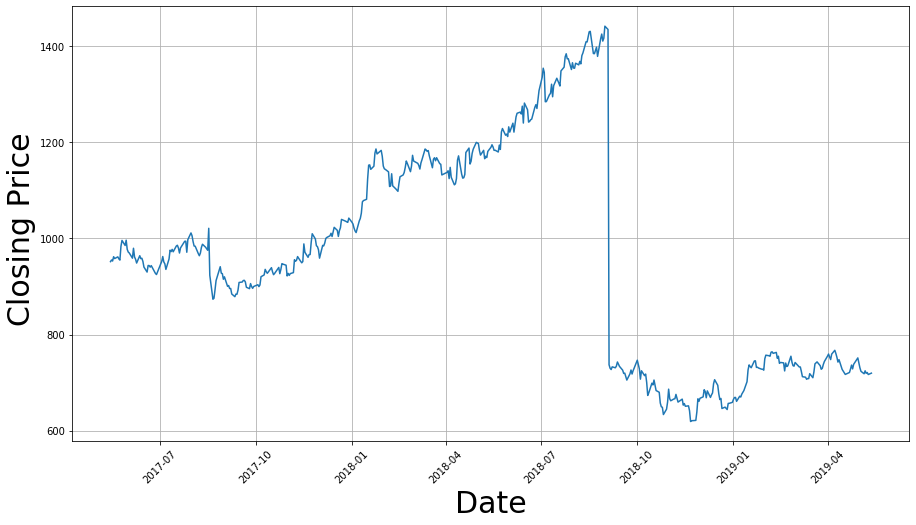

In [7]:
plt.subplots(figsize=(15,8))
plt.plot(data.index,data['Close Price'])           #plot the close price of each day 
plt.grid()
plt.xlabel('Date',size=30)
plt.ylabel('Closing Price ',size=30)
plt.xticks(rotation=45)
plt.show()

In [8]:
data['diff']=abs(data['Close Price']-data['Prev Close'])           #calculate the diff b/w close and prev close price of each day
print('The drastic change is observed on date ',end=" ")

data[data['diff']==max(data['diff'])]['Date']                
id=data[data['diff']==max(data['diff'])]['Date'].index
print(*id,end=" ")
print(' ,with previous closing price of ',end=" ")
print(*(data.loc[id])['Prev Close'],end=" ")
print(' ,obtain the closing price at the end of day at ',end=" ")
print(*(data.loc[id])['Close Price'],' ,a drop of ',(*(data.loc[id])['diff']),' is obtained ')


The drastic change is observed on date  2018-09-04  ,with previous closing price of  1434.25  ,obtain the closing price at the end of day at  737.15  ,a drop of  697.1  is obtained 


In [9]:
#Question 2

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


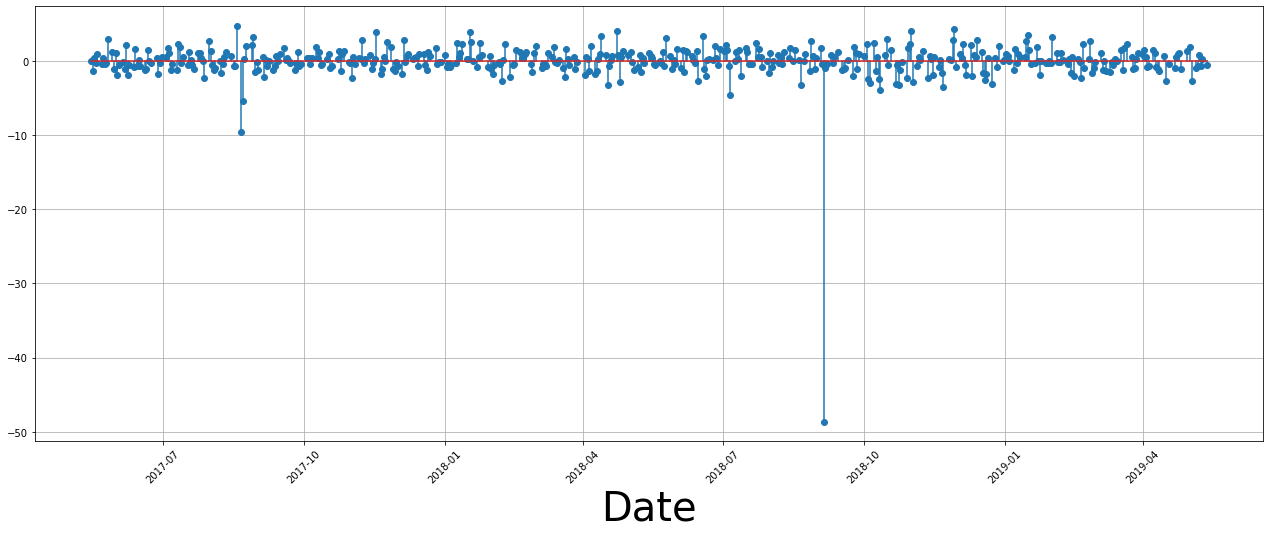

In [10]:
plt.subplots(figsize=(22,8))
plt.stem(data.index,(data['Day_Perc_Change']))          #plots the day precentage loss or profit acc to daily basis
plt.xlabel('Date',size=40)
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [11]:
#Question 3

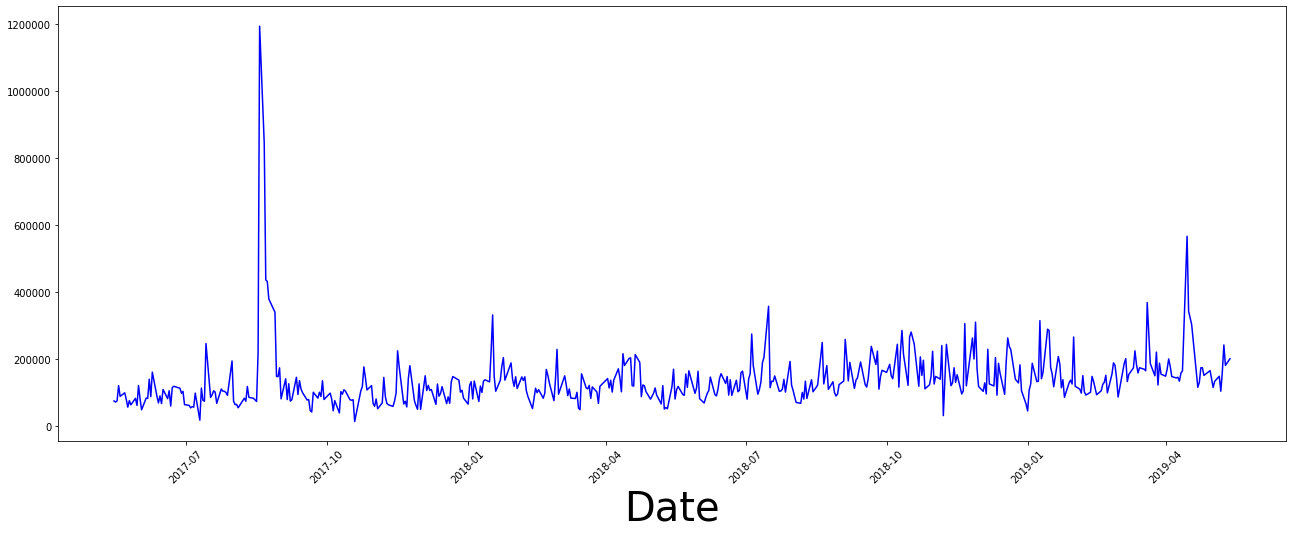

In [12]:
plt.subplots(figsize=(22,8))
plt.plot(data['No. of Trades'],color='b')         #daily volume plot
plt.xticks(rotation=45)
plt.xlabel('Date',size=40)
plt.show()

In [13]:
#Question 4

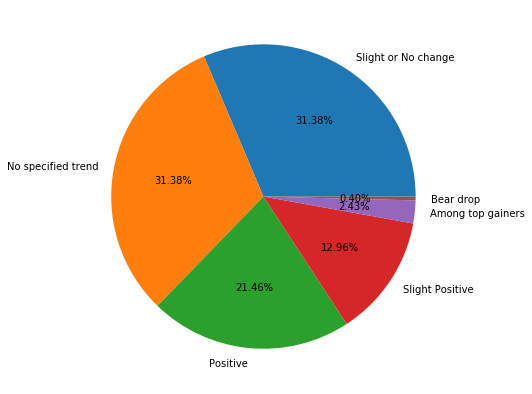

In [14]:
plt.subplots(figsize=(7,7))
li=data['Trend'].value_counts()
plt.pie(li.values,labels=li.index,autopct='%.2f%%')           #plot the diff percentage of trends in data
plt.show()

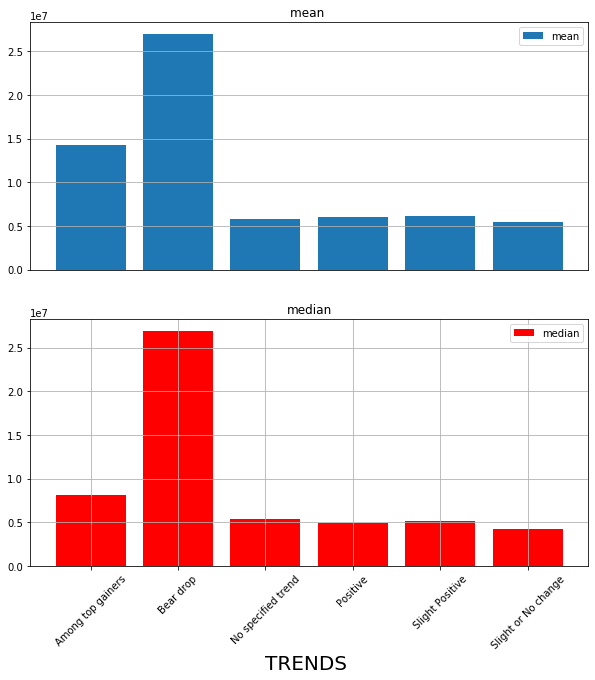

In [15]:
x=data.groupby(['Trend'])         #used to group data by trend
ax=[]
ay=[]
ax1=[]
ay1=[]
for ele in list(x):
    ax.append(ele[0])
    ax1.append(ele[0])
    ay.append(ele[1]['Total Traded Quantity'].mean())             #calulate the mean on each trend
    ay1.append(ele[1]['Total Traded Quantity'].median())          #calculate the median on each trend

plt.subplots(figsize=(10,10))
x=plt.subplot(2,1,1)
plt.title('mean ')

a=x.bar(ax,ay)
plt.legend([a],['mean'])
plt.grid()
plt.xticks([],[])
y=plt.subplot(2,1,2)
plt.title('median')
b=y.bar(ax1,ay1,color='r')
plt.grid()
plt.xticks(rotation=45)
plt.legend([b],['median'])
#plt.title('Average of total traded quantity about each trend specified ')
plt.xlabel('TRENDS ',size=20)
plt.show()

In [16]:
#Question 5

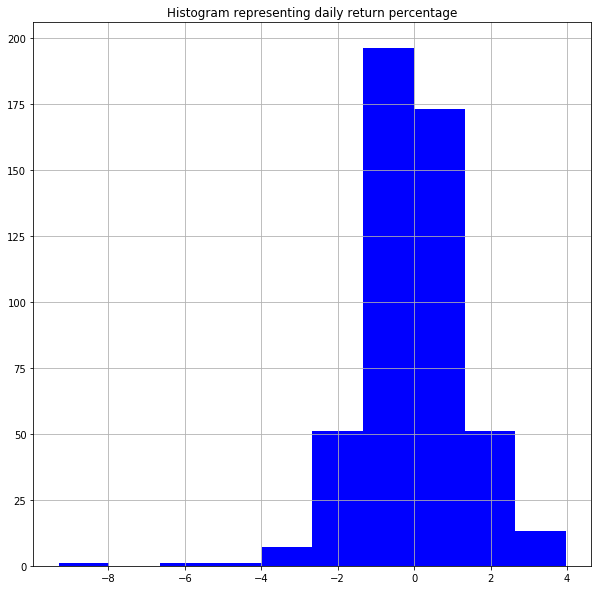

In [17]:
plt.subplots(figsize=(10,10))
x=((data['Close Price']-data['Open Price'])/data['Open Price'])*100    #daily percentage return 
plt.hist(x,color='b')
plt.title('Histogram representing daily return percentage')
plt.grid()
plt.show()

In [18]:
#Question 6

In [19]:
import seaborn as sns
data['Close Price']

Date
2017-05-15    951.55
2017-05-16    955.00
2017-05-17    952.80
2017-05-18    961.75
2017-05-19    957.95
               ...  
2019-05-07    724.55
2019-05-08    719.35
2019-05-09    721.05
2019-05-10    716.85
2019-05-13    719.70
Name: Close Price, Length: 494, dtype: float64

In [227]:
li=[68,45,64,186,387]                 # pick any 5 stocks
#data=data['Close Price']
data_f=[]
for ele in li:
    x=data.iloc[ele]
    #print(x)
    data_f.append(pd.DataFrame(data=x))     #append the diff dataframes

In [21]:
req_data=pd.concat(data_f,ignore_index=False,join='outer',axis=1)    #merge all the 5 dataframes into one dataframe
req_data.pct_change                                                 #make all the points in dataframe about percentage change
req_data.dropna(inplace=True)                                       #drop nan values from the dataframe
li=req_data.loc['Trend']                                            #contains the trend
req_data.columns=li
req_data                                                           #the new dataframe contains 5 dataframes

Trend,Bear drop,Positive,Slight Positive,Slight or No change,Positive
Unnamed: 0,68,45,64,186,387
Symbol,INFY,INFY,INFY,INFY,INFY
Series,EQ,EQ,EQ,EQ,EQ
Date,2017-08-21 00:00:00,2017-07-18 00:00:00,2017-08-14 00:00:00,2018-02-08 00:00:00,2018-12-05 00:00:00
Prev Close,923.25,984.05,987.7,1109.05,685.25
Open Price,924,986.05,988,1122.8,683
High Price,924,1004.8,989.2,1146.4,683.65
Low Price,870,981.1,977.15,1116.55,672.5
Last Price,870.15,983.65,982,1133,682.05
Close Price,873.4,985.6,981.45,1134.25,681.4


,Close Price,Open Price,High Price,Low Price,Day_Perc_Change
Trend,,,,,
Bear drop,873.4,924,924,870,-9.56066
Positive,985.6,986.05,1004.8,981.1,1.2345
Slight Positive,981.45,988,989.2,977.15,0.657325
Slight or No change,1134.25,1122.8,1146.4,1116.55,0.117355
Positive,681.4,683,683.65,672.5,2.22272


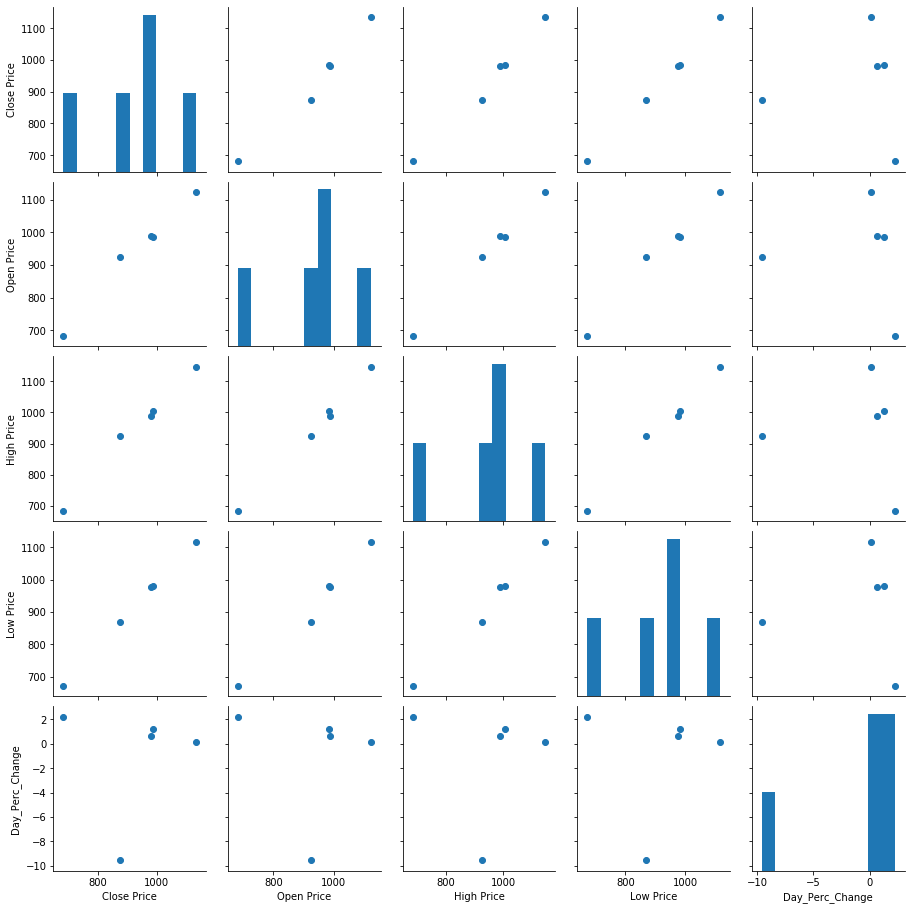

In [222]:
import seaborn as sns

new_data1=pd.DataFrame(req_data.loc['Close Price'])
new_data2=pd.DataFrame(req_data.loc['Open Price'])
new_data3=pd.DataFrame(req_data.loc['High Price'])
new_data4=pd.DataFrame(req_data.loc['Low Price'])
new_data5=pd.DataFrame(req_data.loc['Day_Perc_Change'])
new_data=pd.concat([new_data1,new_data2,new_data3,new_data4,new_data5],axis=1)      #concatenate only int values 
g = sns.pairplot(new_data)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
new_data.dropna()

In [23]:
#Question 7

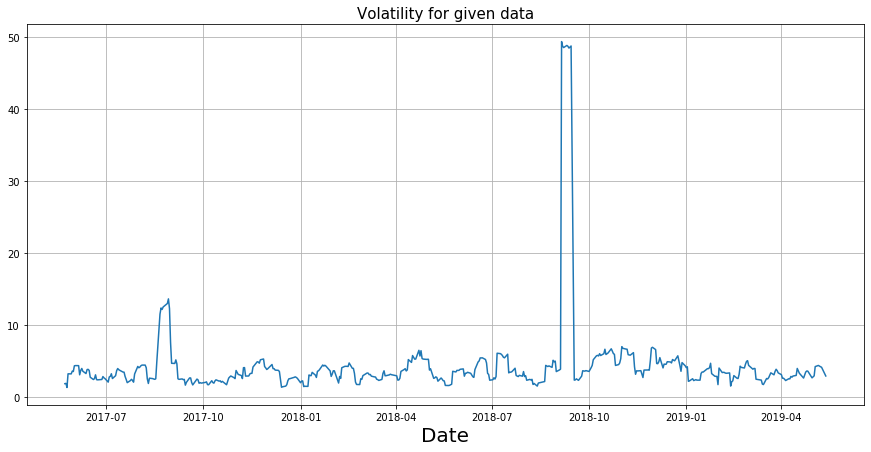

In [35]:
#data['Day_Perc_Change'].rolling(7).sum()
import math
dat=data.copy()
dat.dropna(inplace=True)
x=dat['Day_Perc_Change']
x.dropna(inplace=True)
li=[]
li= x.rolling(window=7).std() * np.sqrt(7)               #use rolling window of size 7 and calulate the standard deviation
plt.subplots(figsize=(15,7))
plt.plot(x.index,li)
plt.grid()
plt.title('Volatility for given data',size=15)
plt.xlabel('Date',size=20)
plt.show()

In [25]:
#Question 8

[*********************100%***********************]  1 of 1 completed


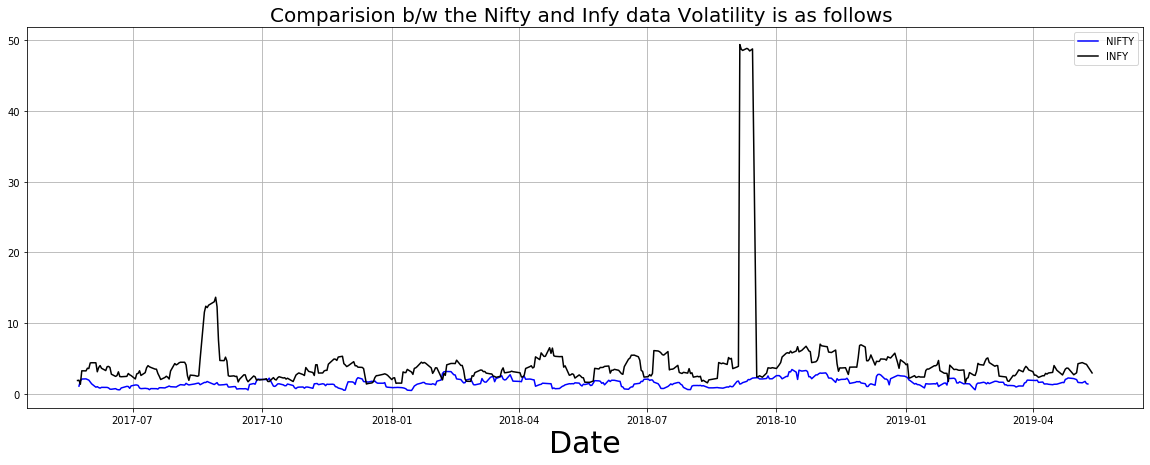

In [33]:
## Computing Volatility

# Load the required modules and packages
import numpy as np
import pandas_datareader.data as web
import yfinance as yf

# Pull NIFTY data from Yahoo finance 
NIFTY = yf.download('^NSEI',start='2017-05-15', end='2019-05-13')           #using nifty dataset

# Compute the logarithmic returns using the Closing price 
NIFTY['Log_Ret'] = ((NIFTY['Close']-NIFTY['Open']) / NIFTY['Close'].shift(1))*100      #calculate the perc change in price

# Compute Volatility using the pandas rolling standard deviation function
NIFTY['Volatility'] = NIFTY['Log_Ret'].rolling(window=7).std() * np.sqrt(7)            #calculate the volatility 

# Plot the NIFTY Price series and the Volatility
plt.subplots(figsize=(20,7))
NIFTY['Volatility'].dropna(inplace=True)
plt.plot(NIFTY['Volatility'].index,NIFTY['Volatility'], color='BLUE')
plt.xlabel('Date',size=30)
plt.title('Comparision b/w the Nifty and Infy data Volatility is as follows ',size=20)
plt.plot(x.index,li,color='black')
plt.legend(['NIFTY','INFY'])
plt.grid()
plt.show()

In [ ]:
#Question 9

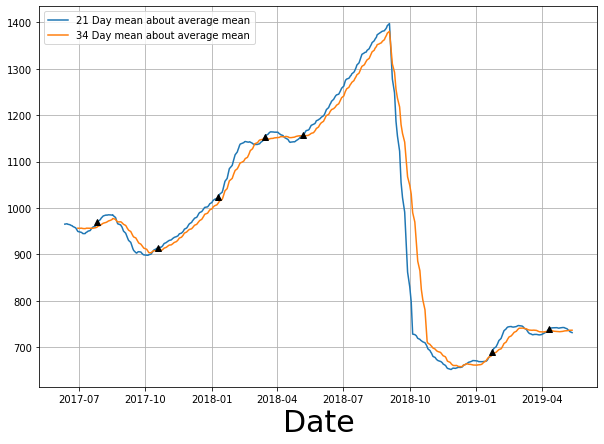

In [189]:
x=dat['Average Price'].rolling(window=21).mean()
x.dropna(inplace=True)
y=dat['Average Price'].rolling(window=34).mean()
y.dropna(inplace=True)
plt.subplots(figsize=(10,7))
plt.grid()
plt.plot(x.index,x)
plt.plot(y.index,y)
plt.legend(['21 Day mean about average mean','34 Day mean about average mean'])
x_=[]
y_=[]
x=x[y.index]
for i in range(len(list(y))):
    if((list(x)[i]>list(y)[i])):
        #print(i,list(x)[i]-list(y)[i])
        x_.append(x[i])
        y_.append(x.index[i])
plt.plot(y_[5],x_[5],'b^',color='black')
plt.plot(y_[27],x_[27],'b^',color='black')
plt.plot(y_[84],x_[84],'b^',color='black')
plt.plot(y_[118],x_[118],'b^',color='black')
plt.plot(y_[135],x_[135],'b^',color='black')
plt.plot(y_[241],x_[241],'b^',color='black')
plt.plot(y_[275],x_[275],'b^',color='black')
plt.xlabel('Date',size=30)
plt.show()


In [ ]:
#Question 10

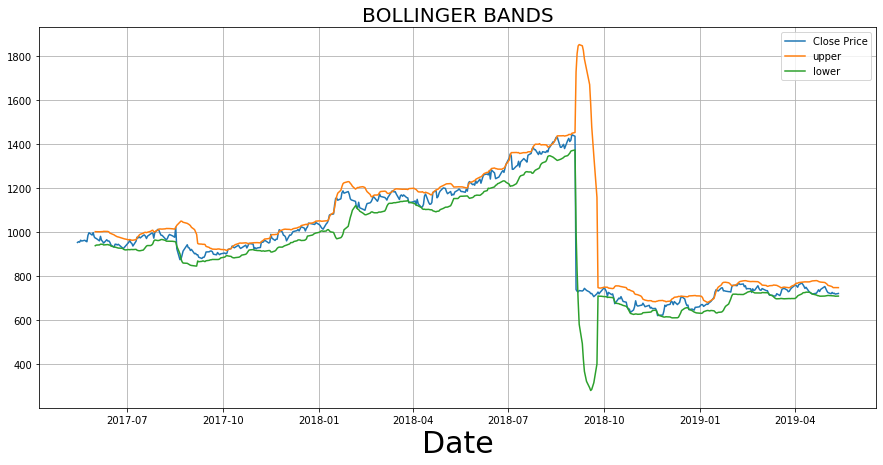

In [211]:
x=dat['Close Price'].rolling(window=14).mean()
y=dat['Close Price'].rolling(window=14).std()
x.dropna(inplace=True)
y.dropna(inplace=True)
dat['upper']=x+y*2                     #the upper limit
dat['lower']=x-y*2                     #the lower limit
dat['upper'].dropna(inplace=True)
dat['lower'].dropna(inplace=True)
dat[['Close Price','upper','lower']].plot(figsize=(15,7))
plt.grid()
plt.title('BOLLINGER BANDS',size=20)
plt.xlabel('Date',size=30)
plt.show()

In [226]:
dat.dropna(inplace=True) 
dat.to_csv('week3.csv')